## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import math as mt


# Study data files
mouse_metadata_path = "Data/mouse_metadata.csv"
study_results_path = "Data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

df

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
len(df)

1893

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_count[['Mouse ID','Timepoint']]


,Mouse ID,Timepoint
Mouse ID,,
a203,1,10
a251,1,10
a262,1,10
a275,1,10
a366,1,7
...,...,...
z435,1,3
z578,1,10
z581,1,10


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

mice_count = df.groupby('Mouse ID').nunique()
df.groupby('Mouse ID').nunique()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,,
a203,1,1,1,1,1,10,10,3
a251,1,1,1,1,1,10,10,2
a262,1,1,1,1,1,10,10,5
a275,1,1,1,1,1,10,10,4
a366,1,1,1,1,1,7,7,2
...,...,...,...,...,...,...,...,...
z435,1,1,1,1,1,3,3,1
z578,1,1,1,1,1,10,10,1
z581,1,1,1,1,1,10,10,4


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop_duplicates(subset=['Mouse ID'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.
# len(mice_count)
len(df.drop_duplicates(subset=['Mouse ID']))

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
df.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# df.groupby('Tumor Volume (mm3)').describe()

drug_data = df.groupby('Drug Regimen').agg(\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)
drug_data   

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_type = df.groupby('Drug Regimen')
mice_per_count = pd.DataFrame(drug_type['Drug Regimen'].count())
mice_per_count

,Drug Regimen
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


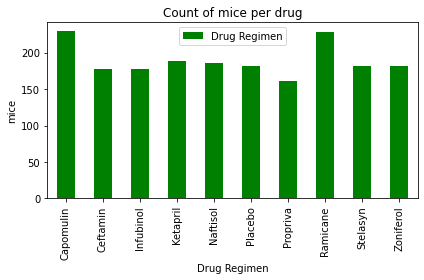

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

count_chart = mice_per_count.plot(kind='bar', title="Count of mice per drug", color="green")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("mice")
plt.tight_layout()

plt.show()


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_type = df.groupby('Sex')
gender_type_count = pd.DataFrame(gender_type['Sex'].count())
gender_type_count



,Sex
Sex,
Female,935
Male,958


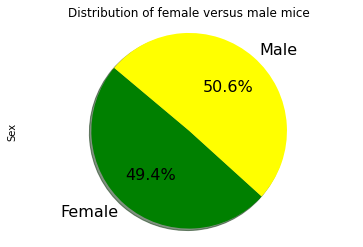

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_type_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["green","yellow"],legend =False)

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = df[df['Drug Regimen'].isin(four_drug_list)]
four_drugs.head()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_drug_list:
    
    quartiles = quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
# Check if it is the first time through the for loop, if so then print dividing line at top only
if counter == 0:
    print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

NameError: name 'quantile' is not defined

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
